In [1]:
ratings_id = 20

import requests
import random
import json

response = requests.get(f"http://localhost:9877/ratings?show_scores=True")
ratings = response.json()
rating = next(r for r in ratings if r['id'] == ratings_id)


response = requests.get(f"http://localhost:9877/testsets/{rating['testset_id']}")
content = response.json()

questions_json = content["questions"]

#get random 10 questions
questions = json.loads(questions_json)

In [27]:
ratings_id = 28

import requests
import random
import json

#response = requests.get(f"http://localhost:9877/ratings?show_scores=True")
#ratings = response.json()
#rating = next(r for r in ratings if r['id'] == ratings_id)



def get_testset_stats(testset_id, host="http://localhost:9876"):
    response = requests.get(f"{host}/testsets/{testset_id}")
    content = response.json()

    questions_json = content["questions"]
    questions = json.loads(questions_json)

    print(questions['question'])

    keywords = ['Zahlungsmethoden', 'payment methods', 'verfolgen', 'Lieferung', 'Tracking', 'Versandgebühr']

    count_irrelevant = sum(
        any(keyword.lower() in question.lower() for keyword in keywords)
        for question in questions['question'].values()
    )

    return content["num_questions"], len(questions['question'].values()), count_irrelevant

In [22]:
ollama_testset_ids = [1, 5, 6, 4, 2, 3]
ollama_testset_stats = []

for testset_id in ollama_testset_ids:
    testset_stats = get_testset_stats(testset_id)
    ollama_testset_stats.append(
        {
            "testset_id": testset_id,
            "questions_requested": testset_stats[0],
            "questions_generated": testset_stats[1],
            "questions_irrelevant": testset_stats[2],
            "questions_generation_loss": testset_stats[0] - testset_stats[1],
            "error_rate": round(1- (testset_stats[1] - testset_stats[2]) / testset_stats[0], 2)
        }
    )

ollama_testset_stats

{"question":{"a35ca961-2bd7-443d-be84-f532431d6ebb":"Warum hat sich die Gr\u00fcndung verz\u00f6gert?","4fc2c118-fb0e-419a-a7ed-f53059dc26e6":"Wo stehen die Dienste und Funktionalit\u00e4ten bereit?","a5abd219-ea65-4c50-bc33-14f0e36cb19c":"Wie viele Schulen k\u00f6nnen im Moment monatlich ein System ohne Komplikationen eingerichtet bekommen, und welche Faktoren beeinflussen diese Anzahl?","2c445c9f-66c8-4cec-803f-fab656f9d4bc":"Was sind die Verpflichtungen des Auftragnehmers bei der Verarbeitung personenbezogener Daten f\u00fcr den Auftraggeber?","1641cf7a-ecf3-4cee-807a-583f9bce5f40":"Wie hat die Coronapandemie die Kundenakquise der Grundschulen beeinflusst, insbesondere im Hinblick auf die Einhaltung schriftlicher Kommunikationsvorgaben gem\u00e4\u00df \u00a7 4 Abs. 4 S\u00e4tze 1-3?","2aa4d1c2-ff43-4bad-b3c4-91602a5dbae1":"Unter welchen Umst\u00e4nden kann der Anbieter den Vertrag k\u00fcndigen, wenn das Unternehmen seine finanzwirtschaftlichen Ziele w\u00e4hrend des Stipendiums nic

TypeError: string indices must be integers

In [28]:
#oai_testset_ids = [7, 8, 9, 10, 11, 12]
oai_testset_ids = [47]
oai_testset_stats = []

for testset_id in oai_testset_ids:
    testset_stats = get_testset_stats(testset_id)
    print(testset_stats)
    oai_testset_stats.append(
        {
            "testset_id": testset_id,
            "questions_requested": testset_stats[0],
            "questions_generated": testset_stats[1],
            "questions_irrelevant": testset_stats[2],
            "questions_generation_loss": testset_stats[0] - testset_stats[1],
            "error_rate": round(1- (testset_stats[1] - testset_stats[2]) / testset_stats[0], 2)
        }
    )

oai_testset_stats

{'65ad3d73-76b1-4980-a1f4-3c0d84a0309b': 'Warum werden auf der Website Cookies gesetzt und welche Vorteile bieten sie den Nutzern?', 'c660a4d0-a0e0-4aae-8be6-0b00de6b229d': 'Wie hoch war die Gebühr für die Gewerbeanmeldung von Leon Bartz am 17.02.2021?', '9da0f54e-cfe6-4abe-877f-fdc32e582c0a': 'Beschreiben Sie unter Berücksichtigung des Vertragsdokuments 122 detailliert, welche konkreten Schritte die Vertragsparteien unternehmen müssen, falls eine Klausel des Vertrages für unwirksam erklärt wird oder eine ausfüllungsbedürftige Lücke entsteht, und erläutern Sie zusätzlich, wie dabei sichergestellt wird, dass der wirtschaftliche Zweck der ursprünglichen Bestimmung oder der Vertrag insgesamt gewahrt bleibt. Gehen Sie dabei explizit darauf ein, wie die Wirksamkeit der übrigen Vertragsbestimmungen trotz dieser Situation garantiert wird.', '59dbdc43-36d7-402f-9eec-fa99aa43136e': 'Bitte erläutern Sie unter Berücksichtigung der im Kontext genannten Kostenschätzungen und der Tatsache, dass das 

[{'testset_id': 47,
  'questions_requested': 15,
  'questions_generated': 12,
  'questions_irrelevant': 0,
  'questions_generation_loss': 3,
  'error_rate': 0.2}]

In [90]:
scores_json = rating['scores']
import json
scores = json.loads(scores_json)

import pandas as pd

df_scores = pd.DataFrame(scores)
reshaped_scores = df_scores.to_dict('records')

reshaped_scores[0]

{'user_input': 'Welche Bestätigung wird bezüglich anderer Fördermittel im Kontext des Gründerstipendiums.NRW gegeben?',
 'retrieved_contexts': ['Zuwendungsempfänger/-in: \nBewilligungsbehörde: \nForschungszentrum Jülich GmbH \nProjektträger Jülich \nBereich TRI – Rolf Hassel \n52425 Jülich \nAnforderung der Zuwendungsmittel \nIhr Zuwendungsbescheid vom  \nPtJ-Az.:  \nfür das Vorhaben: Gründerstipendium.NRW - \nSehr geehrte Damen und Herren, \nder o. a. Zuwendungsbescheid ist bestandskräftig \ndurch Ablauf der Frist, Klage zu erheben. Klage wurde nicht erhoben. \ndurch RechtsPLWWHOYerzicht der hiermit ausdrücklich erklärt wird.  \nDie bewilligte Zuwendung wird gemäß Zuwendungsbescheid vorschüssig für den Zeitraum \nvom bis als Teilbetrag i.H.v angefordert. \n(77\x1100\x11----) (77\x1100\x11----) (Betrag in EUR) \nsind Die bereits abgerufenen Teilbeträge von insgesamt      \x03\n(Betrag in EUR) \n Es sind bisher keine Teilbeträge ausgezahlt worden. \nEs wird bestätigt, dass die Stipendia

In [91]:
df_questions = pd.DataFrame(questions)
reshaped_questions = df_questions.reset_index().rename(columns={'index': 'id'}).to_dict('records')

reshaped_questions[0]

{'id': 'c3122398-5526-442c-aed2-c2179144d59f',
 'question': 'Welche Bestätigung wird bezüglich anderer Fördermittel im Kontext des Gründerstipendiums.NRW gegeben?',
 'reference_answer': 'Es wird bestätigt, dass die Stipendiatin/der Stipendiat während des Durchführungszeitraums kein Stipendium oder andere Fördermittel zur Finanzierung seines/ihres Lebensunterhaltes erhalten hat.',
 'reference_context': 'Document 83: Zuwendungsempfänger/-in: \nBewilligungsbehörde: \nForschungszentrum Jülich GmbH \nProjektträger Jülich \nBereich TRI – Rolf Hassel \n52425 Jülich \nAnforderung der Zuwendungsmittel \nIhr Zuwendungsbescheid vom  \nPtJ-Az.:  \nfür das Vorhaben: Gründerstipendium.NRW - \nSehr geehrte Damen und Herren, \nder o. a. Zuwendungsbescheid ist bestandskräftig \ndurch Ablauf der Frist, Klage zu erheben. Klage wurde nicht erhoben. \ndurch RechtsPLWWHOYerzicht der hiermit ausdrücklich erklärt wird.  \nDie bewilligte Zuwendung wird gemäß Zuwendungsbescheid vorschüssig für den Zeitraum \nvo

In [92]:
print(len(reshaped_questions))
print(len(reshaped_scores))

95
95


In [93]:
if not len(reshaped_questions) == len(reshaped_scores):
    raise ValueError("Number of questions and scores do not match")

In [94]:
# Create a list to store merged entries
merged_entries = []

# Iterate through reshaped_questions and merge with corresponding scores
for i, question in enumerate(reshaped_questions):
    if i < len(reshaped_scores):
        merged_entry = question.copy()  # Start with question entry
        merged_entry.update(reshaped_scores[i])  # Update with score data
        merged_entries.append(merged_entry)
    else:
        merged_entries.append(question)  # Add question without scores if no matching score exists

# Convert back to DataFrame for easier manipulation if needed
df_merged = pd.DataFrame(merged_entries)

In [95]:
merged_entries[0].keys()

dict_keys(['id', 'question', 'reference_answer', 'reference_context', 'conversation_history', 'metadata', 'user_input', 'retrieved_contexts', 'response', 'reference', 'answer_relevancy', 'context_precision', 'faithfulness', 'context_recall', 'raw_response'])

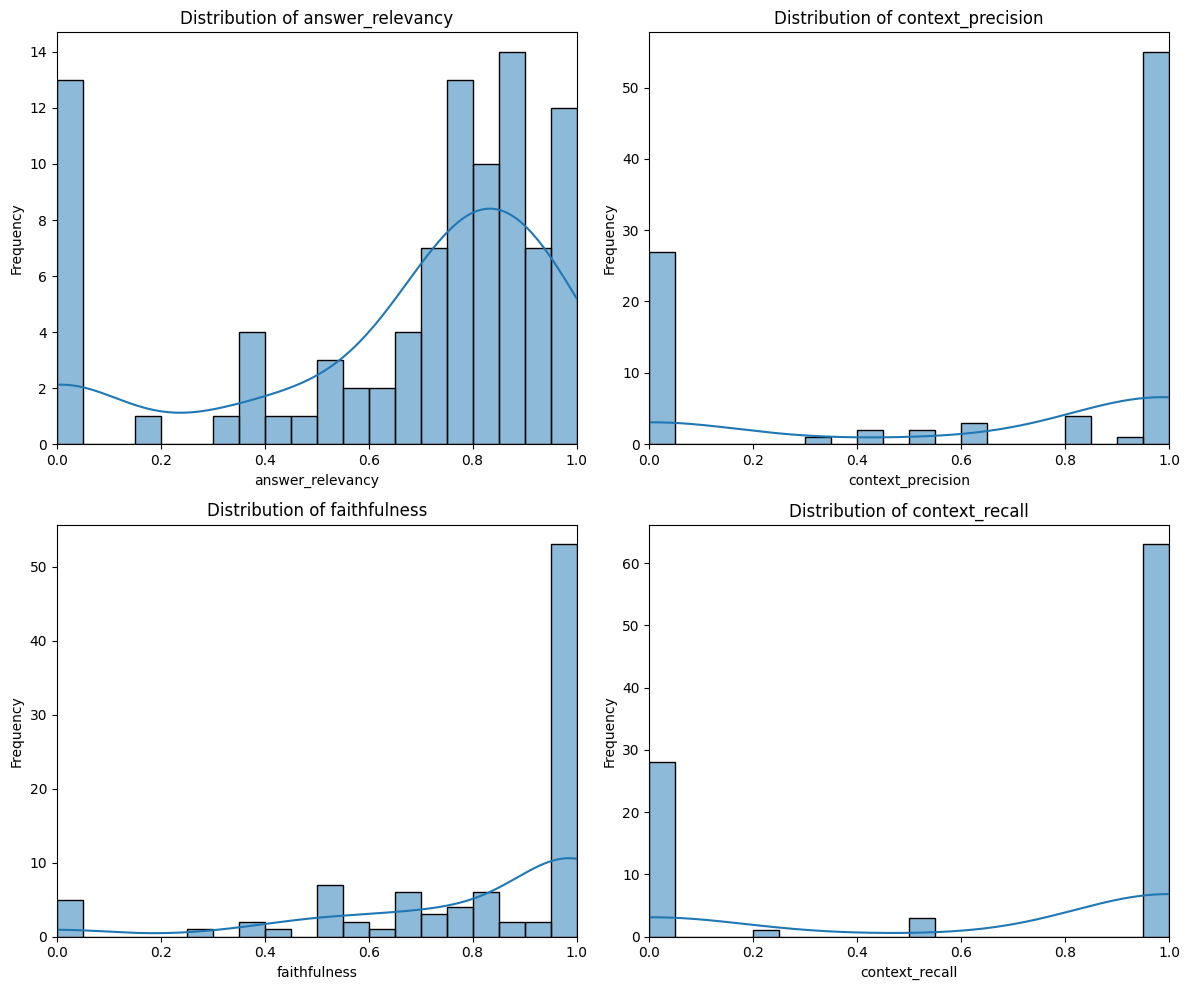

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# The scores to plot
scores_to_plot = ['answer_relevancy', 'context_precision', 'faithfulness', 'context_recall']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot the distribution for each score
for i, score in enumerate(scores_to_plot):
    sns.histplot(df_merged[score], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {score}')
    axes[i].set_xlabel(score)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()

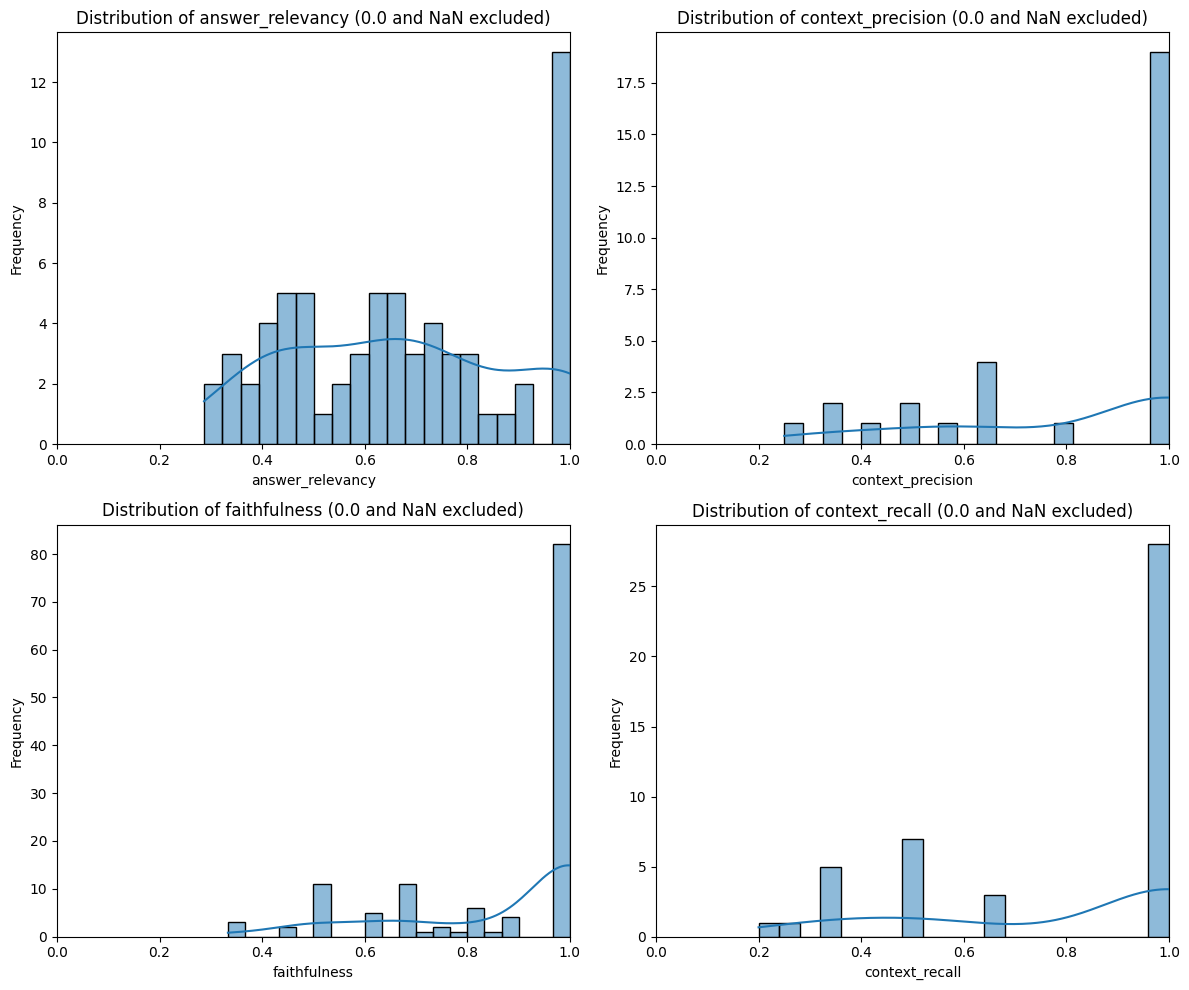

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# The scores to plot
scores_to_plot = ['answer_relevancy', 'context_precision', 'faithfulness', 'context_recall']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot the distribution for each score
for i, score in enumerate(scores_to_plot):
    # For each score, filter out NaN and 0.0 values individually.
    # This way, we don't discard the entire row.
    plot_data = df_merged[score].dropna()
    plot_data = plot_data[plot_data != 0.0]
    
    sns.histplot(plot_data, ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {score} (0.0 and NaN excluded)')
    axes[i].set_xlabel(score)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()

In [63]:
# The scores to check
scores_to_check = ['answer_relevancy', 'context_precision', 'faithfulness', 'context_recall']

# Find entries where all specified scores are 0.0
entries_with_all_zeros = [
    entry for entry in merged_entries 
    if all(entry.get(score) == 0.0 for score in scores_to_check)
]

# Print the number of matching entries found
print(f"Found {len(entries_with_all_zeros)} entries where all scores are 0.0.")

Found 106 entries where all scores are 0.0.


In [64]:
#entries_with_all_zeros[0]

import pyperclip

#pyperclip.copy(json.dumps(entries_with_all_zeros, indent=2, ensure_ascii=False))

In [65]:
import re

# This assumes 'entries_with_all_zeros' is available from a previous cell.

for entry in entries_with_all_zeros:
    context = entry.get('reference_context')

    # Standardize the context to a single string for analysis.
    if isinstance(context, list):
        context_str = ' '.join(str(c) for c in context)
    else:
        context_str = str(context or '')

    total_length = len(context_str)

    if total_length > 0:
        # Find all characters that are not letters, numbers, or whitespace.
        special_chars_found = re.findall(r'[^A-Za-z0-9\s]', context_str)
        special_char_count = len(special_chars_found)
        special_char_ratio = special_char_count / total_length
    else:
        # Set defaults for empty contexts.
        special_char_count = 0
        special_char_ratio = 0.0

    # Add the new attributes to the entry dictionary.
    entry['context_total_length'] = total_length
    entry['context_special_char_count'] = special_char_count
    entry['context_special_char_ratio'] = special_char_ratio

print("Analysis complete. The following attributes have been added to each entry in 'entries_with_all_zeros':")
print("- context_total_length")
print("- context_special_char_count")
print("- context_special_char_ratio")

# Display the first 3 entries to verify the new attributes.
if len(entries_with_all_zeros) > 3:
    for i in range(3):
        print(f"\n--- Entry {i} ---")
        # Print only the new keys for brevity
        print({k: entries_with_all_zeros[i][k] for k in ['context_total_length', 'context_special_char_count', 'context_special_char_ratio']})
else:
     for i, entry in enumerate(entries_with_all_zeros):
        print(f"\n--- Entry {i} ---")
        print({k: entry[k] for k in ['context_total_length', 'context_special_char_count', 'context_special_char_ratio']})


Analysis complete. The following attributes have been added to each entry in 'entries_with_all_zeros':
- context_total_length
- context_special_char_count
- context_special_char_ratio

--- Entry 0 ---
{'context_total_length': 507, 'context_special_char_count': 162, 'context_special_char_ratio': 0.31952662721893493}

--- Entry 1 ---
{'context_total_length': 389, 'context_special_char_count': 105, 'context_special_char_ratio': 0.2699228791773779}

--- Entry 2 ---
{'context_total_length': 2062, 'context_special_char_count': 384, 'context_special_char_ratio': 0.18622696411251213}


In [66]:
entries_with_all_zeros[4]

{'id': 'c05379c2-5070-4fbf-9784-3559569ecf15',
 'question': 'In welche Länder liefern Sie?',
 'reference_answer': 'Wir liefern in alle 50 Bundesstaaten der USA sowie nach Kanada und Mexiko.',
 'reference_context': 'Document 5528: Veröffentlicht von J. Rudnicka, 17.09.2020 \n\n\n\n\n\nDas Produkt basiert auf den Gegebenheiten einer Schule der Primarstufe (Grundschule). Nutzer sind hauptsächlich die Eltern und weniger die Schüler. Da einzelne Funktionen jedoch auch von Schülern genutzt werden sollen, muss die Bedienung eindeutig und einfach gehalten sein. Weiterführende Schulen benötigen andere Funktionen, wofür das Grundmodell jederzeit erweitert werden kann.',
 'conversation_history': [],
 'metadata': {'question_type': 'simple',
  'seed_document_id': 5528,
  'topic': '<think>\nOkay, so I need to figure out the best topic that represents all these documents provided. Let me start by reading through each document carefully and noting down the key points.\n\nFirst document: Talks about de

Total entries analyzed: 106
Number of entries with a special character ratio greater than 5%: 89


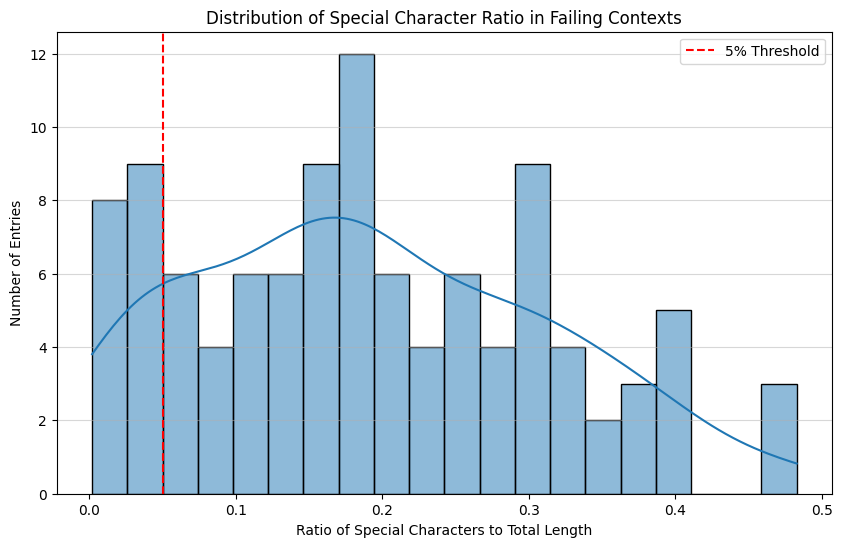

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# This assumes 'entries_with_all_zeros' is available from a previous cell.

# --- Count entries with a ratio greater than 5% ---
threshold = 0.05
count_above_threshold = sum(1 for entry in entries_with_all_zeros if entry.get('context_special_char_ratio', 0) > threshold)

print(f"Total entries analyzed: {len(entries_with_all_zeros)}")
print(f"Number of entries with a special character ratio greater than {threshold:.0%}: {count_above_threshold}")

# --- Plotting the distribution ---

# Extract the ratios for plotting.
ratios = [entry['context_special_char_ratio'] for entry in entries_with_all_zeros]

# Create the plot.
plt.figure(figsize=(10, 6))
sns.histplot(ratios, kde=True, bins=20)

# Set the title and labels for clarity.
plt.title('Distribution of Special Character Ratio in Failing Contexts')
plt.xlabel('Ratio of Special Characters to Total Length')
plt.ylabel('Number of Entries')
plt.grid(axis='y', alpha=0.5)

# Add a vertical line to the plot to mark the threshold.
plt.axvline(x=threshold, color='r', linestyle='--', label=f'{threshold:.0%} Threshold')
plt.legend()

# Show the plot.
plt.show()

In [67]:
# This assumes 'entries_with_all_zeros' is available from a previous cell.

threshold = 0.05

# Create a new list with entries that are at or below the threshold.
entries_below_threshold = [
    entry for entry in entries_with_all_zeros 
    if entry.get('context_special_char_ratio', 0) <= threshold
]

print(f"Found {len(entries_below_threshold)} entries with a special character ratio of {threshold:.0%} or less.")

# Display the first 3 entries from the new list for inspection.
# This helps to verify the content without printing a huge amount of data.
if len(entries_below_threshold) > 3:
    print("\nHere are the first 3 entries for inspection:")
    for i in range(3):
        print(f"\n--- Entry {i} ---")
        print(entries_below_threshold[i])
else:
    print("\nHere are the entries for inspection:")
    for i, entry in enumerate(entries_below_threshold):
        print(f"\n--- Entry {i} ---")
        print(entry)


Found 17 entries with a special character ratio of 5% or less.

Here are the first 3 entries for inspection:

--- Entry 0 ---
{'id': 'c05379c2-5070-4fbf-9784-3559569ecf15', 'question': 'In welche Länder liefern Sie?', 'reference_answer': 'Wir liefern in alle 50 Bundesstaaten der USA sowie nach Kanada und Mexiko.', 'reference_context': 'Document 5528: Veröffentlicht von J. Rudnicka, 17.09.2020 \n\n\n\n\n\nDas Produkt basiert auf den Gegebenheiten einer Schule der Primarstufe (Grundschule). Nutzer sind hauptsächlich die Eltern und weniger die Schüler. Da einzelne Funktionen jedoch auch von Schülern genutzt werden sollen, muss die Bedienung eindeutig und einfach gehalten sein. Weiterführende Schulen benötigen andere Funktionen, wofür das Grundmodell jederzeit erweitert werden kann.', 'conversation_history': [], 'metadata': {'question_type': 'simple', 'seed_document_id': 5528, 'topic': '<think>\nOkay, so I need to figure out the best topic that represents all these documents provided. Let 

In [73]:
# The ID you want to find
target_id = '57e43087-fb2b-4cbc-a29b-79edeefdb71b'

# Use pandas to filter the DataFrame.
# This works by accessing the 'id' key within the dictionaries of the 'metadata' column.
matching_row = df_merged[df_merged['id'] == target_id]

print(matching_row.to_json())

def get_report_by_id(id: str):
    # Use pandas to filter the DataFrame.
    # This works by accessing the 'id' key within the dictionaries of the 'metadata' column.
    return df_merged[df_merged['id'] == target_id]


{"id":{"113":"57e43087-fb2b-4cbc-a29b-79edeefdb71b"},"question":{"113":"Who receives the allocation and who is responsible for the project?"},"reference_answer":{"113":"The recipient of the allocation is Forschungszentrum J\u00fclich GmbH, and the project carrier is Projekttr\u00e4ger J\u00fclich (PtJ)."},"reference_context":{"113":"Document 4481: Anlage 1 zum Zuwendungsbescheid \nF\u00f6rderkennzeichen: \nPtJ-Projektnummer: \n(Zuwendungsempf\u00e4nger) \nForschungszentrum J\u00fclich GmbH \nProjekttr\u00e4ger J\u00fclich (PtJ) \nBereich TRI \u2013 Rolf Hassel \n52425 J\u00fclich \nZuwendung des Landes Nordrhein-Westfalen f\u00fcr das Vorhaben \u201eGr\u00fcnderstipendium.NRW \u2013\nZuwendungsbescheid vom \nF\u00f6rderkennzeichen: \nPtJ-Projektnummer: \nErkl\u00e4rungen  \n(Kenntnisnahme von subventionserheblichen Tatsachen, Rechtsmittelverzicht) \nA Subventionserhebliche Tatsachen im Sinne des \u00a7 264 StGB\n\nDocument 4529: Anlage 1 zum Zuwendungsbescheid \nF\u00f6rderkennzeichen:

In [ ]:
ratings_id = 81 #17
rating, questions, scores = get_rating_data(ratings_id, host="http://localhost:9876")
df_merged_10_15_17 = merge_questions_and_scores(questions, scores)

#fig = plot_score_distributions(df_merged_10_15_17)

#result_entry_id = "a5abd219-ea65-4c50-bc33-14f0e36cb19c" # for rating 17
#result_entry_id = "7ec3c427-bf74-4c6a-90e9-a7dac668e004" #for rating 81, 1.0
result_entry_id = "c04dff55-e9ca-492c-97bb-884fa9b3bb5c" #for rating 81, 0.58

investigate = df_merged_10_15_17[df_merged_10_15_17['id'] == result_entry_id].to_dict('records')[0]
investigate
#df_merged_10_15_17[(df_merged_10_15_17['context_precision'] > 0.5) & (df_merged_10_15_17['context_precision'] < 0.6)]

In [ ]:
import sys
sys.path.append("/Users/leonbartz/develop/uni/rag-eval")

from ragas import SingleTurnSample
from ragas.metrics import LLMContextPrecisionWithoutReference
from ragas.llms import LangchainLLMWrapper
from app.chat_models.langchain.creator.openai_creator import OpenAILangChainChatModelCreator
from ragas.cache import DiskCacheBackend

# Clear any existing cache
cacher = DiskCacheBackend()
cacher.cache.clear()

results = []
for i in range(10):
    context_precision = LLMContextPrecisionWithoutReference(
        llm=LangchainLLMWrapper(
            langchain_llm=OpenAILangChainChatModelCreator("openai/gpt-4.1").create_model(),
            cache=cacher
        )
    )

    sample = SingleTurnSample(
        user_input=investigate["question"],
        response=investigate["response"],
        retrieved_contexts=investigate["retrieved_contexts"], 
    )

    result = await context_precision.single_turn_ascore(sample)
    print(result)
    results.append(result)

    cacher.cache.clear()

results

In [1]:
from ragas import SingleTurnSample
from ragas.metrics import LLMContextPrecisionWithoutReference
from ragas.llms import LangchainLLMWrapper
from langchain_ollama import ChatOllama

context_precision = LLMContextPrecisionWithoutReference(
    llm=LangchainLLMWrapper(
        langchain_llm=ChatOllama(
            model="deepseek-r1:7b", 
            base_url="http://127.0.0.1:11436",
        )
    )
)

sample = SingleTurnSample(
    user_input=investigate["question"],
    response=investigate["response"],
    retrieved_contexts=investigate["retrieved_contexts"], 
)

results = []
for i in range(4):
    result = await context_precision.single_turn_ascore(sample)
    print(result)
    results.append(result)

results

NameError: name 'investigate' is not defined

In [ ]:
import sys
sys.path.append("/Users/leonbartz/develop/uni/rag-eval")

from ragas import SingleTurnSample
from ragas.metrics import LLMContextPrecisionWithoutReference, LLMContextPrecisionWithReference
from ragas.llms import LangchainLLMWrapper
from app.chat_models.langchain.creator.ollama_creator import OllamaLangChainChatModelCreator
from app.chat_models.langchain.creator.openai_creator import OpenAILangChainChatModelCreator

context_precision = LLMContextPrecisionWithReference(llm=LangchainLLMWrapper(langchain_llm=OpenAILangChainChatModelCreator("openai/gpt-4.1").create_model()))

sample = SingleTurnSample(
    user_input=investigate["question"],
    reference=investigate["reference"],
    retrieved_contexts=investigate["retrieved_contexts"], 
)


await context_precision.single_turn_ascore(sample)

results = []
for i in range(10):
    results.append(await context_precision.single_turn_ascore(sample))

results